C:\Users\jan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

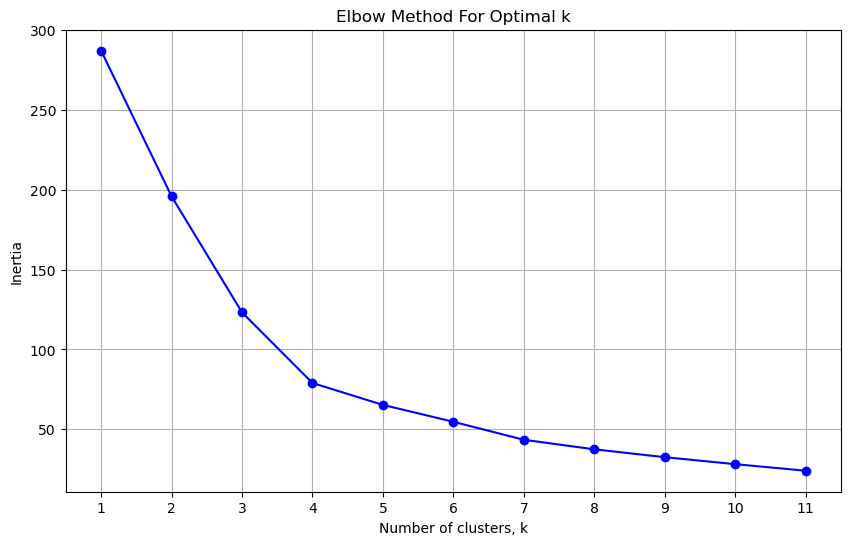

C:\Users\jan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                           

C:\Users\jan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


NameError: name 'kmeans_pca' is not defined

In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    Path("Resources/crypto_market_data.csv"),
    index_col="coin_id")

# Normalize the data
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)


# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    df_market_data_scaled,
    columns=df_market_data.columns,
    index=df_market_data.index
)

k_range = range(1, 12)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_scaled)
    inertia.append(kmeans.inertia_)
    
df_elbow_original = pd.DataFrame({
    'k': list(k_range),
    'inertia': inertia
})
    
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Answer Question
display(HTML('<h2 style="font-size: 24px; font-weight: bold;">The best K value is 4</h2>'))

# Assuming df_market_data_scaled is your scaled original data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_market_data_scaled)

# Predict and assign cluster labels to each data point in the scaled dataset using the trained K-means model
clusters_origional = kmeans.predict(df_market_data_scaled)
print(clusters_origional)  # This prints the array of cluster labels

# Create a copy of the original data to not alter the original DataFrame
df_market_data_with_clusters_origional = df_market_data.copy()
df_market_data_with_clusters_origional['Cluster_Origional'] = clusters_origional

# Review the DataFrame with the new 'Cluster' column
print(df_market_data_with_clusters_origional.head())

# Perform PCA with n_components=3
pca = PCA(n_components=3)
pca_results = pca.fit_transform(df_market_data_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# Initialize and fit the K-means model with four clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_pca)

# Predict the clusters
# clusters_pca = kmeans.predict(df_pca)

# Predict the clusters
clusters_pca = kmeans_pca.predict(pca_results)

# Add cluster labels to the PCA DataFrame
df_pca['Cluster_PCA'] = clusters_pca

# Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster_PCA'], cmap='viridis', marker='o', alpha=0.7)
plt.title('Cryptocurrency Clusters based on PCA Components')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Cluster')
plt.show()

# Define the range of k values to test for KMeans clustering
k_range = range(1, 12)

# Initialize an empty list to store inertia values for each k
inertia_pca = []

# Loop through each value of k in the defined range
for k in k_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(pca_results)
    inertia_pca.append(kmeans_pca.inertia_)

# Create a DataFrame to hold the k values and their corresponding inertia for easier plotting    
df_elbow_pca = pd.DataFrame({
    'k': list(k_range),
    'inertia': inertia
})


# Plot the elbow curve using the k values and their corresponding inertia
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_pca, marker='o', linestyle='-', color='b')
plt.title('Elbow Method For Optimal k (PCA Data)')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Answer Question
display(HTML('<h2 style="font-size: 24px; font-weight: bold;">The best K value is 4 for both the original and PCA-transformed data.</h2>'))


# Initialize the K-means model with four clusters using the best value for k found
kmeans_pca = KMeans(n_clusters=4, random_state=42)

# Fit the K-means model using the PCA-transformed data
kmeans_pca.fit(pca_results)  # Assuming pca_results is your PCA data from earlier steps

# Predict the clusters
clusters_pca = kmeans_pca.predict(pca_results)

# Review the resulting array of cluster values
print(clusters_pca)

# Create a DataFrame from the PCA results with a new column for clusters
df_pca_clusters = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)
df_pca_clusters['Cluster'] = clusters_pca

# Visualize the clusters based on PCA components using hvPlot
display(HTML('<h2 style="font-size: 24px; font-weight: bold;">Visualize the clusters based on PCA components using hvPlot</h2>'))
df_pca_clusters.hvplot.scatter(x='PC1', y='PC2', by='Cluster', hover_cols=['coin_id'], colormap='viridis')

In [ ]:
# Create elbow plots for original and PCA-transformed data
elbow_plot_original = df_elbow_original.hvplot.line(
    x='k', y='inertia', 
    label='Original Data', 
    color='blue', 
    width=600, height=400
)

elbow_plot_pca = df_elbow_pca.hvplot.line(
    x='k', y='inertia', 
    label='PCA Data', 
    color='green', 
    width=600, height=400
)

# Composite plot to compare elbow curves
composite_elbow_plot = elbow_plot_original + elbow_plot_pca
composite_elbow_plot.opts(title="Elbow Curve Comparison: Original vs PCA")

# Display the composite plot
composite_elbow_plot

In [2]:
# Visualization for the original data clustering
cluster_plot_original = df_market_data_with_clusters_origional.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    by='Cluster_Origional',  # Ensure this column name matches your DataFrame
    colormap='Category10',
    width=400,
    height=400,
    title="Original Data Clustering"
)

# Visualization for the PCA data clustering
cluster_plot_pca = df_pca.hvplot.scatter(
    x='PC1', 
    y='PC2',
    by='Cluster_PCA',  # Ensure this column name matches your DataFrame
    colormap='Category10',
    width=400,
    height=400,
    title="PCA Data Clustering"
)

# Create a composite plot
composite_cluster_plot = cluster_plot_original + cluster_plot_pca

# Display the composite plot
composite_cluster_plot

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['Cluster_PCA']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

In [3]:
# Answer Question
display(HTML('<h3 style="font-size: 24px; font-weight: bold;">Using fewer features to cluster data by using K-means, through PCA, generally leads to a more streamlined and efficient clustering process, with improved visualization capabilities. However, it\'s essential to balance dimensionality reduction with the preservation of meaningful variance to ensure that the clusters formed are both interpretable and reflective of the underlying data.</h3>'))